In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical,load_img,img_to_array
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [ ]:
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x = x_test

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
x_train.dtype

dtype('uint8')

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


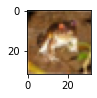

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


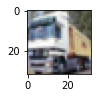

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


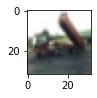

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


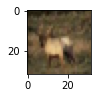

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


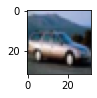

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


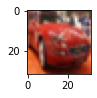

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


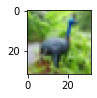

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


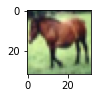

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


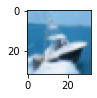

In [ ]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
  print(y_train[i])
  plt.show()

#names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
x_train = x_train.astype('float32')/255.0 #chia dữ liệu về dạng 0:1 
x_test = x_test.astype('float32')/255.0

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# MODEL CNN
from keras.models import Sequential
from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D

model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(32,32,3)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

In [ ]:

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD

opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_data=(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
782/782 [==============================] - 26s 25ms/step - loss: 1.3024 - accuracy: 0.5323 - val_loss: 1.0827 - val_accuracy: 0.6132
Epoch 2/10
782/782 [==============================] - 19s 25ms/step - loss: 0.9884 - accuracy: 0.6497 - val_loss: 1.0120 - val_accuracy: 0.6563
Epoch 3/10
782/782 [==============================] - 20s 26ms/step - loss: 0.8038 - accuracy: 0.7179 - val_loss: 0.7924 - val_accuracy: 0.7290
Epoch 4/10
782/782 [==============================] - 19s 24ms/step - loss: 0.6807 - accuracy: 0.7615 - val_loss: 0.7836 - val_accuracy: 0.7326
Epoch 5/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5848 - accuracy: 0.7958 - val_loss: 0.7532 - val_accuracy: 0.7449
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 0.5099 - accuracy: 0.8218 - val_loss: 0.7607 - val_accuracy: 0.7492
Epoch 7/10
782/782 [==============================] - 17s 22ms/step - loss: 0.4427 - accuracy: 0.8448 - val_loss: 0.7993 - val_accuracy:

In [ ]:

model.save('CNN_cifar10.h5')

In [ ]:
from keras.models import load_model
model_cifar10 = load_model('CNN_cifar10.h5')

array([8])

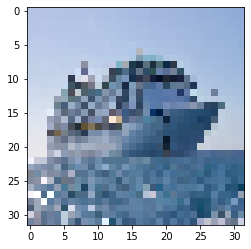

In [ ]:
import numpy as np
img = load_img('ship.jpeg', target_size = (32,32))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,32,32,3) 
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis =1)